# Python Data Structures

## Crealing a lit of lists

In [33]:
!head pulsar_stars.csv

In [1]:
import csv

In [9]:
def csv_to_list(path):
    with open(path) as f:
        reader = csv.reader(f)
        headings = next(reader)
        body = [line for line in reader]
    return headings, body

In [10]:
%timeit csv_to_list('data/pulsar_stars.csv')

32.7 ms &pm; 1.31 ms per loop (mean &pm; std. dev. of 7 runs, 10 loops each)


In [11]:
pulsar_headings, pulsar_data = csv_to_list('data/pulsar_stars.csv')

In [12]:
pulsar_headings

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

In [13]:
pulsar_data[:5]

[['140.5625',
  '55.68378214',
  '-0.234571412',
  '-0.699648398',
  '3.199832776',
  '19.11042633',
  '7.975531794',
  '74.24222492',
  '0'],
 ['102.5078125',
  '58.88243001',
  '0.465318154',
  '-0.515087909',
  '1.677257525',
  '14.86014572',
  '10.57648674',
  '127.3935796',
  '0'],
 ['103.015625',
  '39.34164944',
  '0.323328365',
  '1.051164429',
  '3.121237458',
  '21.74466875',
  '7.735822015',
  '63.17190911',
  '0'],
 ['136.75',
  '57.17844874',
  '-0.068414638',
  '-0.636238369',
  '3.642976589',
  '20.9592803',
  '6.89649891',
  '53.59366067',
  '0'],
 ['88.7265625',
  '40.67222541',
  '0.600866079',
  '1.123491692',
  '1.178929766',
  '11.4687196',
  '14.26957284',
  '252.5673058',
  '0']]

How much memory is used

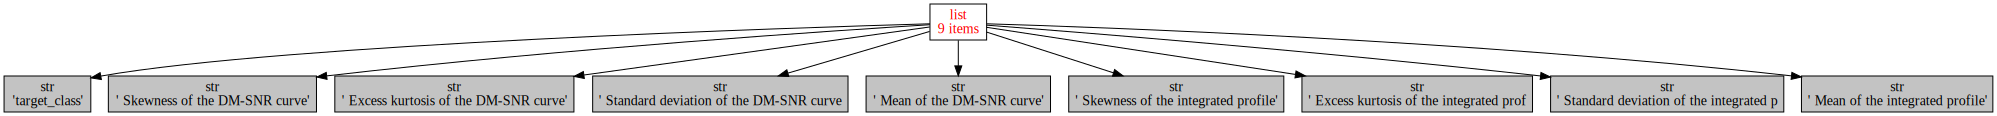

In [29]:
import objgraph
objgraph.show_refs([pulsar_headings], filename='headings-graph.png')

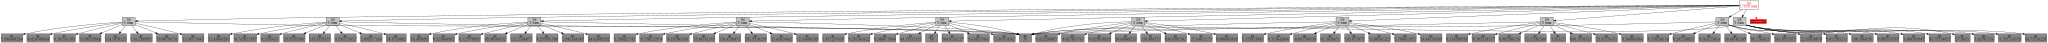

In [30]:
objgraph.show_refs([pulsar_data], filename='pulsar-data-graph.png')

In [31]:
objgraph.show_most_common_types()

list               25301
dict               20423
function           14367
tuple              6124
DFAPlan            5205
weakref            2891
NFAArc             2474
wrapper_descriptor 2197
NFAState           2180
getset_descriptor  1979


In [32]:
import sys
sys.getsizeof(pulsar_headings)

192

In [33]:
sys.getsizeof(pulsar_data)

158200

In [34]:
sys.getsizeof(pulsar_headings[0])

80

In [35]:
[sys.getsizeof(item) for item in pulsar_headings]

[80, 94, 91, 84, 74, 88, 85, 78, 61]

In [36]:
sum([sys.getsizeof(item) for item in pulsar_headings])

735

In [40]:
sum([sum([sys.getsizeof(item) for item in row]) for row in pulsar_data])

9462051

### Creating floats

In [41]:
def csv_to_float_list(path):
    with open(path) as f:
        reader = csv.reader(f)
        headings = next(reader)
        body = [[float(item) for item in line] for line in reader]
    return headings, body

In [42]:
pulsar_headings, pulsar_data = csv_to_float_list('data/pulsar_stars.csv')

In [43]:
sum([sum([sys.getsizeof(item) for item in row]) for row in pulsar_data])

3865968

Getting a single element

In [44]:
pulsar_data[0][0]

140.5625

In [37]:
sys.getsizeof(pulsar_data[0][0])

57

How could we multiply two columns?

In [47]:
%timeit [row[0] * row[1] for row in pulsar_data]

1.59 ms &pm; 5.36 &micro;s per loop (mean &pm; std. dev. of 7 runs, 1000 loops each)


In [45]:
mul = [row[0] * row[1] for row in pulsar_data]

In [46]:
mul[:5]

[7827.05162705375,
 6035.909095009453,
 4052.8046055924997,
 7819.152865195,
 3608.7067498544534]

Losing Your loops From PyCon2015 Jake VanderPlas

In [38]:
def func_python(n):
    d = 0.0
    for i in range(n):
        d += (i % 3 -1) * i
    return d

In [39]:
%timeit func_python(10000)

994 &micro;s &pm; 12.6 &micro;s per loop (mean &pm; std. dev. of 7 runs, 1000 loops each)


In [40]:
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [41]:
%%fortran
subroutine func_fort(n, d)
    integer, intent(in)  :: n
    double precision, intent(out) :: d
    integer :: i
    d = 0
    do i = 0, n - 1
        d = d + (mod(1, 3) -1) * i
    end do
end subroutine func_fort
                    

In [42]:
%timeit func_fort(10000)

97.3 ns &pm; 1.96 ns per loop (mean &pm; std. dev. of 7 runs, 10000000 loops each)


In [48]:
from numba import jit

@jit(nopython=True)
def func_numba_python(n):
    d = 0.0
    for i in range(n):
        d += (i % 3 -1) * i
    return d

In [49]:
%timeit func_numba_python(10000)

15 &micro;s &pm; 4.82 &micro;s per loop (mean &pm; std. dev. of 7 runs, 1 loop each)


In [50]:
%load_ext cython

In [52]:
%%cython -a 
def func_cython(n):
    d = 0.0
    for i in range(n):
        d += (i % 3 -1) * i
    return d

In [54]:
%timeit func_cython(10000)

740 &micro;s &pm; 20.2 &micro;s per loop (mean &pm; std. dev. of 7 runs, 1000 loops each)


In [68]:
%%cython -a 
def func_cython_types(n: int) -> float:
    cdef double d = 0.0
    cdef int i
    for i in range(n):
        d += (i % 3 -1) * i
    return d

In [69]:
%timeit func_cython_types(10000)

23.6 &micro;s &pm; 1.19 &micro;s per loop (mean &pm; std. dev. of 7 runs, 10000 loops each)
